 ## 1. Importation des bibliothèques nécessaires ##

In [1]:
# Pour traiter les dataframes et matrices
import pandas as pd
import numpy as np

# Pour les visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string  # Opérations sur les chaînes de caractères

from sklearn.feature_extraction.text import TfidfVectorizer  # Texte en entier ou en virgule flottante
from sklearn.cluster import KMeans  # Clustering K-means
from sklearn.cluster import AgglomerativeClustering  # AgglomerativeClustering

import nltk
from nltk.corpus import stopwords

import scipy.cluster.hierarchy as shc  # Dendrogramme
import warnings
# Pour masquer les messages d'avertissement dans les graphiques
sns.set()
warnings.filterwarnings('ignore')


In [2]:
# Pour centrer esthétiquement les graphiques
from IPython.core.display import HTML as Centre

Centre(""" 
<style>
.output_png {
    display: flex;
    justify-content: center;
    align-items: center;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [3]:
def make_autopct(values):
    '''
    Cette fonction définit l'autopct pour les diagrammes circulaires selon mes préférences.
    :param values -> les données affichées dans le diagramme circulaire
    '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct, v=val)
    return my_autopct

In [4]:
def setting_dataframe(df):
    '''
    Cette fonction affiche les résultats sous forme de dataframe organisé.
    :param df -> le dataframe 
    '''
    df = df.style.set_table_styles([
        {"selector": "td, th", "props": [("border", "1px solid grey !important"), ("color", "blue"), ("background-color", "#f2f2f2")]},
        {"selector": "th", "props": [('text-align', 'center'), ("background-color", "lightgray")]}
    ])
    df = df.set_properties(**{'text-align': 'center'}).hide_index()
    return df

## 2. Lecture du dataset ##

In [5]:
netflix_df = pd.read_csv("../csv/netflix_titles.csv")

### 2.1 Les données en-tete


In [6]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# Définir la première colonne comme l'index du jeu de données
netflix_df.set_index("show_id", inplace=True)

## 3. Information générale du dataset ##

### 3.1 Taille des données

In [8]:
# Taille des données
taille_donnees = netflix_df.shape
print("Ces données contiennent {} entrées et {} caractéristiques (colonnes).".format(taille_donnees[0], taille_donnees[1]))

Ces données contiennent 7787 entrées et 11 caractéristiques (colonnes).


### 3.2 Caractéristiques des données

In [9]:
# Caractéristiques (colonnes) de ces données
cle_primaire = netflix_df.index.name
colonnes = netflix_df.columns
print("La clé primaire ou l'index de ces données est ({}) et ses colonnes sont : ".format(cle_primaire))
for idx, colonne in enumerate(colonnes):
    print("{}) {}".format(idx+1, colonne), end="\n")

La clé primaire ou l'index de ces données est (show_id) et ses colonnes sont : 
1) type
2) title
3) director
4) cast
5) country
6) date_added
7) release_year
8) rating
9) duration
10) listed_in
11) description


### 3.3 Analyse des données (Rating)

In [10]:
# Ce que chaque colonne représente
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Les informations Obetenues :
1. Certaines caractéristiques (colonnes) contiennent plus d'une information, comme __cast__ et __listed_in__.
2. La colonne __duration__ contient des données incohérentes, car certaines entrées concernent des émissions de télévision et d'autres des films.
3. Il y a des films/émissions télévisées dont le titre est un nombre entier !
4. L'année dans __date_added__ peut différer de __release_year__
5. La colonne __rating__ contient des informations différentes de celles auxquelles je m'attendais !

In [11]:
# 1. Exploration des titres
netflix_df["title"].tail(10)

show_id
s7778                                Zombie Dumb
s7779                                 Zombieland
s7780                                  Zona Rosa
s7781                                        Zoo
s7782                                       Zoom
s7783                                       Zozo
s7784                                     Zubaan
s7785                          Zulu Man in Japan
s7786                      Zumbo's Just Desserts
s7787    ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS
Name: title, dtype: object

In [12]:
# 2. Exploration des évaluations
netflix_df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

> Après quelques recherches :
MPA est l'acronyme de Motion Picture Associations, leur système de classification des films fournit aux parents les informations nécessaires pour déterminer si un film est approprié pour leurs enfants.

Il est donc préférable de changer le nom de cette rubrique afin d'éviter tout malentendu.

In [13]:
netflix_df.rename(columns={"rating": "MPA_rating"}, inplace=True)

<hr>

#### Guide de ratings:

| Rating      | Description                                                                |
|-------------|----------------------------------------------------------------------------|
| TV-MA       | Inapproprié pour les moins de 17 ans (public mature seulement).            |
| TV-14       | Inapproprié pour les moins de 14 ans.                                      |
| TV-PG       | Peut ne pas convenir aux jeunes enfants selon les parents ou tuteurs.       |
| R           | Moins de 17 ans accompagné d'un parent ou d'un tuteur (Restreint).         |
| PG-13       | Avis aux parents, certains contenus peuvent ne pas convenir aux moins de 13 ans. |
| TV-Y        | Programmes destinés à un très jeune public, notamment les enfants de 2 à 6 ans. |
| TV-Y7       | Adapté aux enfants âgés de 7 ans et plus.                                  |
| PG          | Certains contenus peuvent ne pas convenir aux enfants (Guidance parentale suggérée). |
| TV-G        | Convient à tous les âges; ne sont pas nécessairement des émissions pour enfants. |
| NR          | (Non classé)                                                               |
| G           | (Tous publics)                                                             |
| TV-Y7-FV    | Programme avec violence fantastique potentiellement plus intense ou plus combative que d'autres programmes de la catégorie TV-Y7. |
| UR          | (Non classé) (Identique à NR)                                              |
| NC-17       | Aucun enfant de moins de 17 ans.                                           |


In [14]:
# ratings_ages = {
#     'TV-PG': 'Older Kids',
#     'TV-MA': 'Adults',
#     'TV-Y7-FV': 'Older Kids',
#     'TV-Y7': 'Older Kids',
#     'TV-14': 'Teens',
#     'R': 'Adults',
#     'TV-Y': 'Kids',
#     'NR': 'Adults',
#     'PG-13': 'Teens',
#     'TV-G': 'Kids',
#     'PG': 'Older Kids',
#     'G': 'Kids',
#     'UR': 'Adults',
#     'NC-17': 'Adults'
# }

# netflix_df['MPA_rating'] = netflix_df['MPA_rating'].replace(ratings_ages)
# netflix_df['MPA_rating'].unique()

### 3.4 Les occurences des colonnes

In [15]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [16]:
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [17]:
netflix_df['MPA_rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: MPA_rating, dtype: int64

In [18]:
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

<hr>

## 4. Nettoyage du dataset ##

### 4.1 Recherche d'entrées dupliquées ###

In [19]:
duplicateRows = netflix_df[netflix_df.duplicated(["title"])]
duplicateRows

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,


pas de doublons.

<hr>

### 4.2. Recherche de données nulles ###

In [20]:
netflix_df.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
MPA_rating         7
duration           0
listed_in          0
description        0
dtype: int64


Il semble y avoir quelques colonnes avec très peu de zéros, telles que date_added et rating, tandis que de nombreuses autres colonnes ont BEAUCOUP de zéros, comme __director__, __cast__, et __country__.

#### 4.2.1. Traitement des colonnes avec peu de zéros ####

<ul>
    1. Movies/TV Shows ratings
</ul>

In [21]:
# Il y a 7 films sans évaluation, montrons-les et essayons de trouver leurs évaluations
netflix_df[netflix_df["MPA_rating"].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."



#### Sur les plateformes Netflix et IMDB, On les évaluations suivantes pour les films : ### 
* 13th: A Conversation with Oprah Winfrey & Ava DuVernay : PG-13
* Gargantia on the Verdurous Planet : TV-14
* Little Lunch : TV-MA
* Louis C.K. 2017 : TV-MA
* Louis C.K.: Hilarious : NR
* Louis C.K.: Live at the Comedy Store : NC-17
* My Honor Was Loyalty : PG-13

In [22]:
netflix_df.loc[netflix_df['title']=="13TH: A Conversation with Oprah Winfrey & Ava DuVernay", 'MPA_rating'] = "PG-13"
netflix_df.loc[netflix_df['title']=="Gargantia on the Verdurous Planet", 'MPA_rating'] = "TV-14"
netflix_df.loc[netflix_df['title']=="Little Lunch", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K. 2017", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Hilarious", 'MPA_rating'] = "NR"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Live at the Comedy Store", 'MPA_rating'] = "NC-17"
netflix_df.loc[netflix_df['title']=="My Honor Was Loyalty", 'MPA_rating'] = "PG-13"

In [23]:
netflix_df["MPA_rating"].isnull().sum()

0

<ul>
    2. Movies/TV Shows date ajoutée
</ul>

In [24]:
# Il y a 10 films pour lesquels la date d'ajout est nulle
netflix_df[netflix_df['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


#### Sur IMDB, nous avons trouvé leurs dates d'ajout : ####
* A Young Doctor's Notebook and Other Stories : Oct 2, 2013
* Anthony Bourdain: Parts Unknown : Apr 14, 2013
* Frasier : Sep 23, 2003
* Friends : Sep 25, 2003
* Gunslinger Girl : Jan 7, 2008
* Kikoriki : Just 2010
* La Familia P. Luche : Jul 8, 2012
* Maron : May 4, 2016
* Red vs. Blue : Apr 1, 2015
* The Adventures of Figaro Pho : Just 2015

In [25]:
# Assignons les dates d'ajout pour certains films
netflix_df.loc[netflix_df['title']=="A Young Doctor's Notebook and Other Stories", 'date_added'] = "October 2, 2013"
netflix_df.loc[netflix_df['title']=="Anthony Bourdain: Parts Unknown", 'date_added'] = "April 14, 2013"
netflix_df.loc[netflix_df['title']=="Frasier", 'date_added'] = "September 23, 2003"
netflix_df.loc[netflix_df['title']=="Friends", 'date_added'] = "September 25, 2003"
netflix_df.loc[netflix_df['title']=="Gunslinger Girl", 'date_added'] = "January 7, 2008"
netflix_df.loc[netflix_df['title']=="Kikoriki", 'date_added'] = "2010"
netflix_df.loc[netflix_df['title']=="La Familia P. Luche", 'date_added'] = "July 8, 2012"
netflix_df.loc[netflix_df['title']=="Maron", 'date_added'] = "May 4, 2016"
netflix_df.loc[netflix_df['title']=="Red vs. Blue", 'date_added'] = "April 1, 2015"
netflix_df.loc[netflix_df['title']=="The Adventures of Figaro Pho", 'date_added'] = "2015"

In [26]:
netflix_df["date_added"].isnull().sum()

0

#### 4.2.2. Les colonnes ayant le plus de nuls ####

<ul>
    1. country
</ul>

In [27]:
null_pays = netflix_df['country'].isnull().sum()
print("Le nombre d'entrées sans pays (Null) est de {}\
      \nCela représente environ {} % des entrées au total.".format(null_pays, round(null_pays/taille_donnees[0]*100, 2)))


Le nombre d'entrées sans pays (Null) est de 507      
Cela représente environ 6.51 % des entrées au total.


In [28]:
# Le pourcentage montre que le nombre d'entrées est très faible par rapport à l'ensemble des données, nous pouvons donc les supprimer
netflix_df = netflix_df[netflix_df['country'].notna()]

In [29]:
netflix_df["country"].isnull().sum()

0

<hr>

### 4.3. onversion de certaines colonnes en leurs types appropriés ### 

In [30]:
# Conversion de date_added en format datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [31]:
netflix_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
MPA_rating              object
duration                object
listed_in               object
description             object
dtype: object

In [32]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<hr>

## 5. Analyse et visualisation des données ##

### 5.1. TV shows vs. Movies ###

In [33]:
tv_vs_movies = netflix_df['type'].value_counts()
tv_vs_movies = tv_vs_movies.to_list()

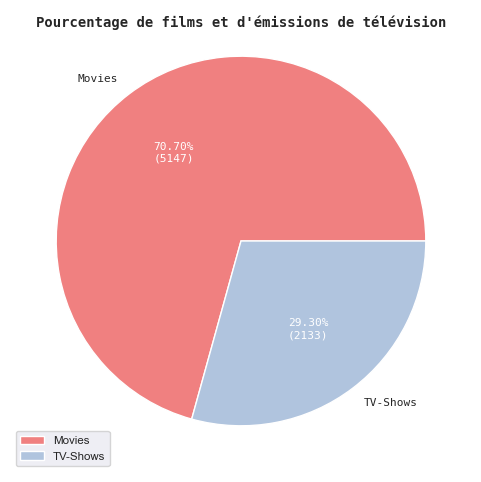

In [34]:
figure = plt.figure(figsize=(6, 6))
_, _, autotexts = plt.pie(tv_vs_movies,
                          labels=['Movies', 'TV-Shows'],
                          autopct=make_autopct(tv_vs_movies), colors=["lightcoral", "lightsteelblue"],
                          textprops={"fontsize": 8, "fontname": "monospace"},
                          wedgeprops={"edgecolor": "white", 'linewidth': 1, 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('white')
plt.title("Pourcentage de films et d'émissions de télévision", fontsize=10, fontweight="bold", fontname="monospace",  y=0.945)
plt.legend(loc='lower left',fontsize='x-small')  # Change the legend position
plt.show()


<hr>

### 5.2. La progression de la création de contenu au fil des ans ###

In [35]:
# # New variable names and colors
# content_count = netflix_df.groupby('release_year').size().to_list()
# years = np.sort(netflix_df['release_year'].unique())
# max_content_count = max(content_count)
# max_index = content_count.index(max_content_count)
 
# figure = plt.figure(figsize=(20, 8), facecolor="lightgray")  # Change the background color here
# plt.plot(years, content_count, color="skyblue", marker='o', markersize=6)
# plt.scatter(years[max_index], max_content_count, s=200, color="darkblue", marker='o')

# plt.title("La croissance de la création de contenu au fil des ans", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
# plt.suptitle("Maximum point represented as big {}".format(r'$\bullet$'),
#              fontsize=13, fontname="monospace", y=0.915)
# plt.xticks(fontsize=13, fontname="monospace")
# plt.yticks(fontsize=13, fontname="monospace")

# plt.show()

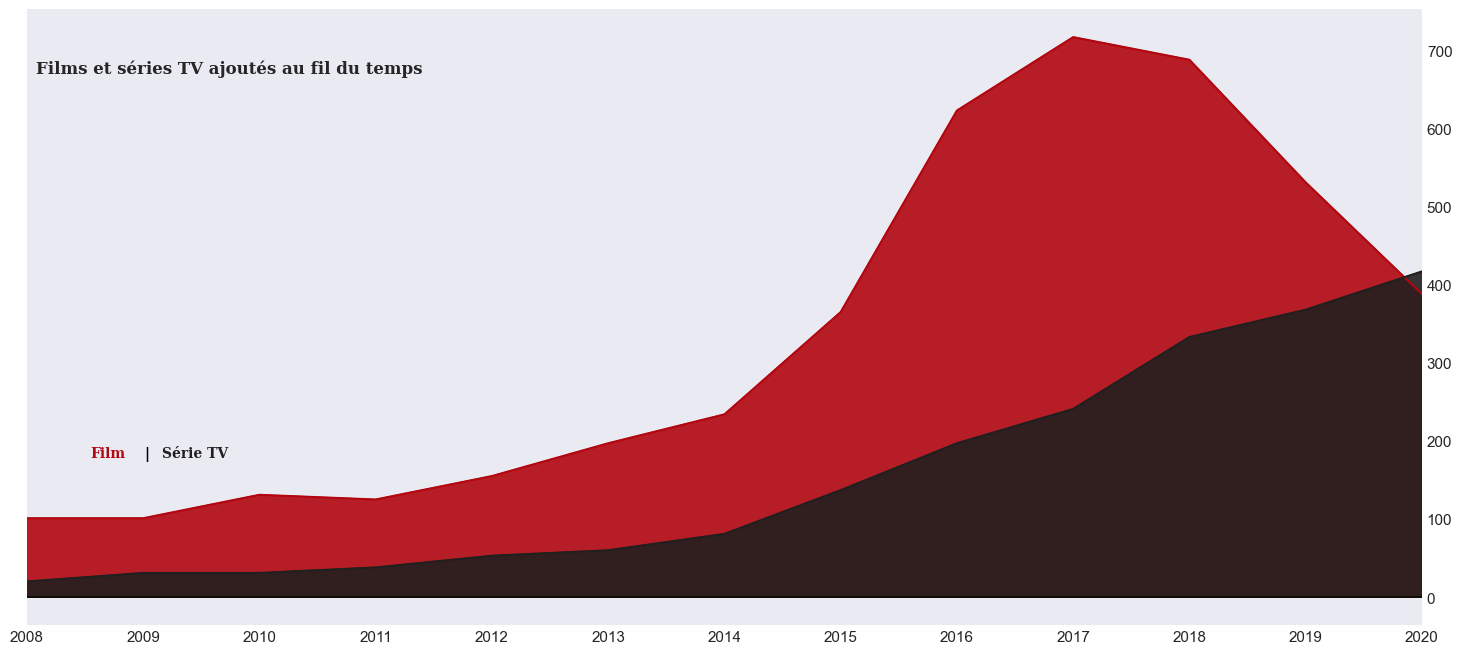

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))  # Ajusté la taille de la figure pour une meilleure esthétique
couleurs = ["#b20710", "#221f1f"]

for i, type_media in enumerate(netflix_df['type'].value_counts().index):
    media_rel = netflix_df[netflix_df['type']==type_media]['release_year'].value_counts().sort_index()
    ax.plot(media_rel.index, media_rel, color=couleurs[i], label=type_media)
    ax.fill_between(media_rel.index, 0, media_rel, color=couleurs[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y=0, color='black', linewidth=1.3, alpha=.7)

# ax.set_ylim(0, 50)
# ax.legend(loc='upper left')
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008, 2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.8, 'Films et séries TV ajoutés au fil du temps', fontsize=12, fontweight='bold', fontfamily='serif')

fig.text(0.16, 0.32, "Film", fontweight="bold", fontfamily='serif', fontsize=10, color='#b20710')
fig.text(0.19, 0.32, "|", fontweight="bold", fontfamily='serif', fontsize=10, color='black')
fig.text(0.2, 0.32, "Série TV", fontweight="bold", fontfamily='serif', fontsize=10, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()


<hr>



#### 5.2 classement des Tv show et Movies

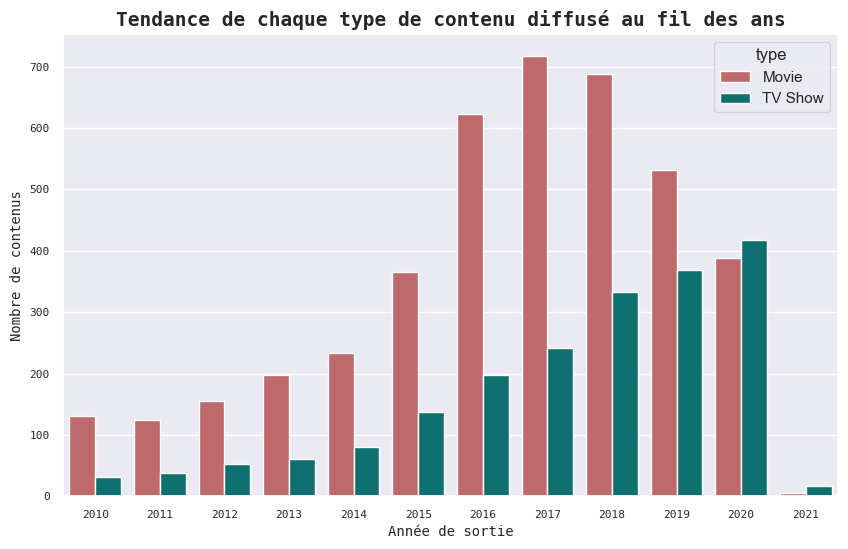

In [37]:
last_decade = netflix_df[["type", "release_year"]]
last_decade = last_decade.rename(columns={"release_year": "Année de sortie"})
last_decade = last_decade[last_decade["Année de sortie"] >= 2010]

colors = ["indianred", "teal", "dodgerblue", "chartreuse", "lightsalmon"]

plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x="Année de sortie", data=last_decade, hue="type", palette=colors[:2])  # Selecting the first two colors from the list
count_plot.set_title("Tendance de chaque type de contenu diffusé au fil des ans", fontname='monospace', fontsize=14, fontweight='bold')
plt.xlabel("Année de sortie", fontname='monospace', fontsize=10)
plt.ylabel("Nombre de contenus", fontname='monospace', fontsize=10)
plt.xticks(fontname='monospace', fontsize=8)
plt.yticks(fontname='monospace', fontsize=8)
plt.show()



<hr>



### 5.3. les créations de contenu au fil des mois ###

In [38]:
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month

In [39]:
# netflix_df.head()

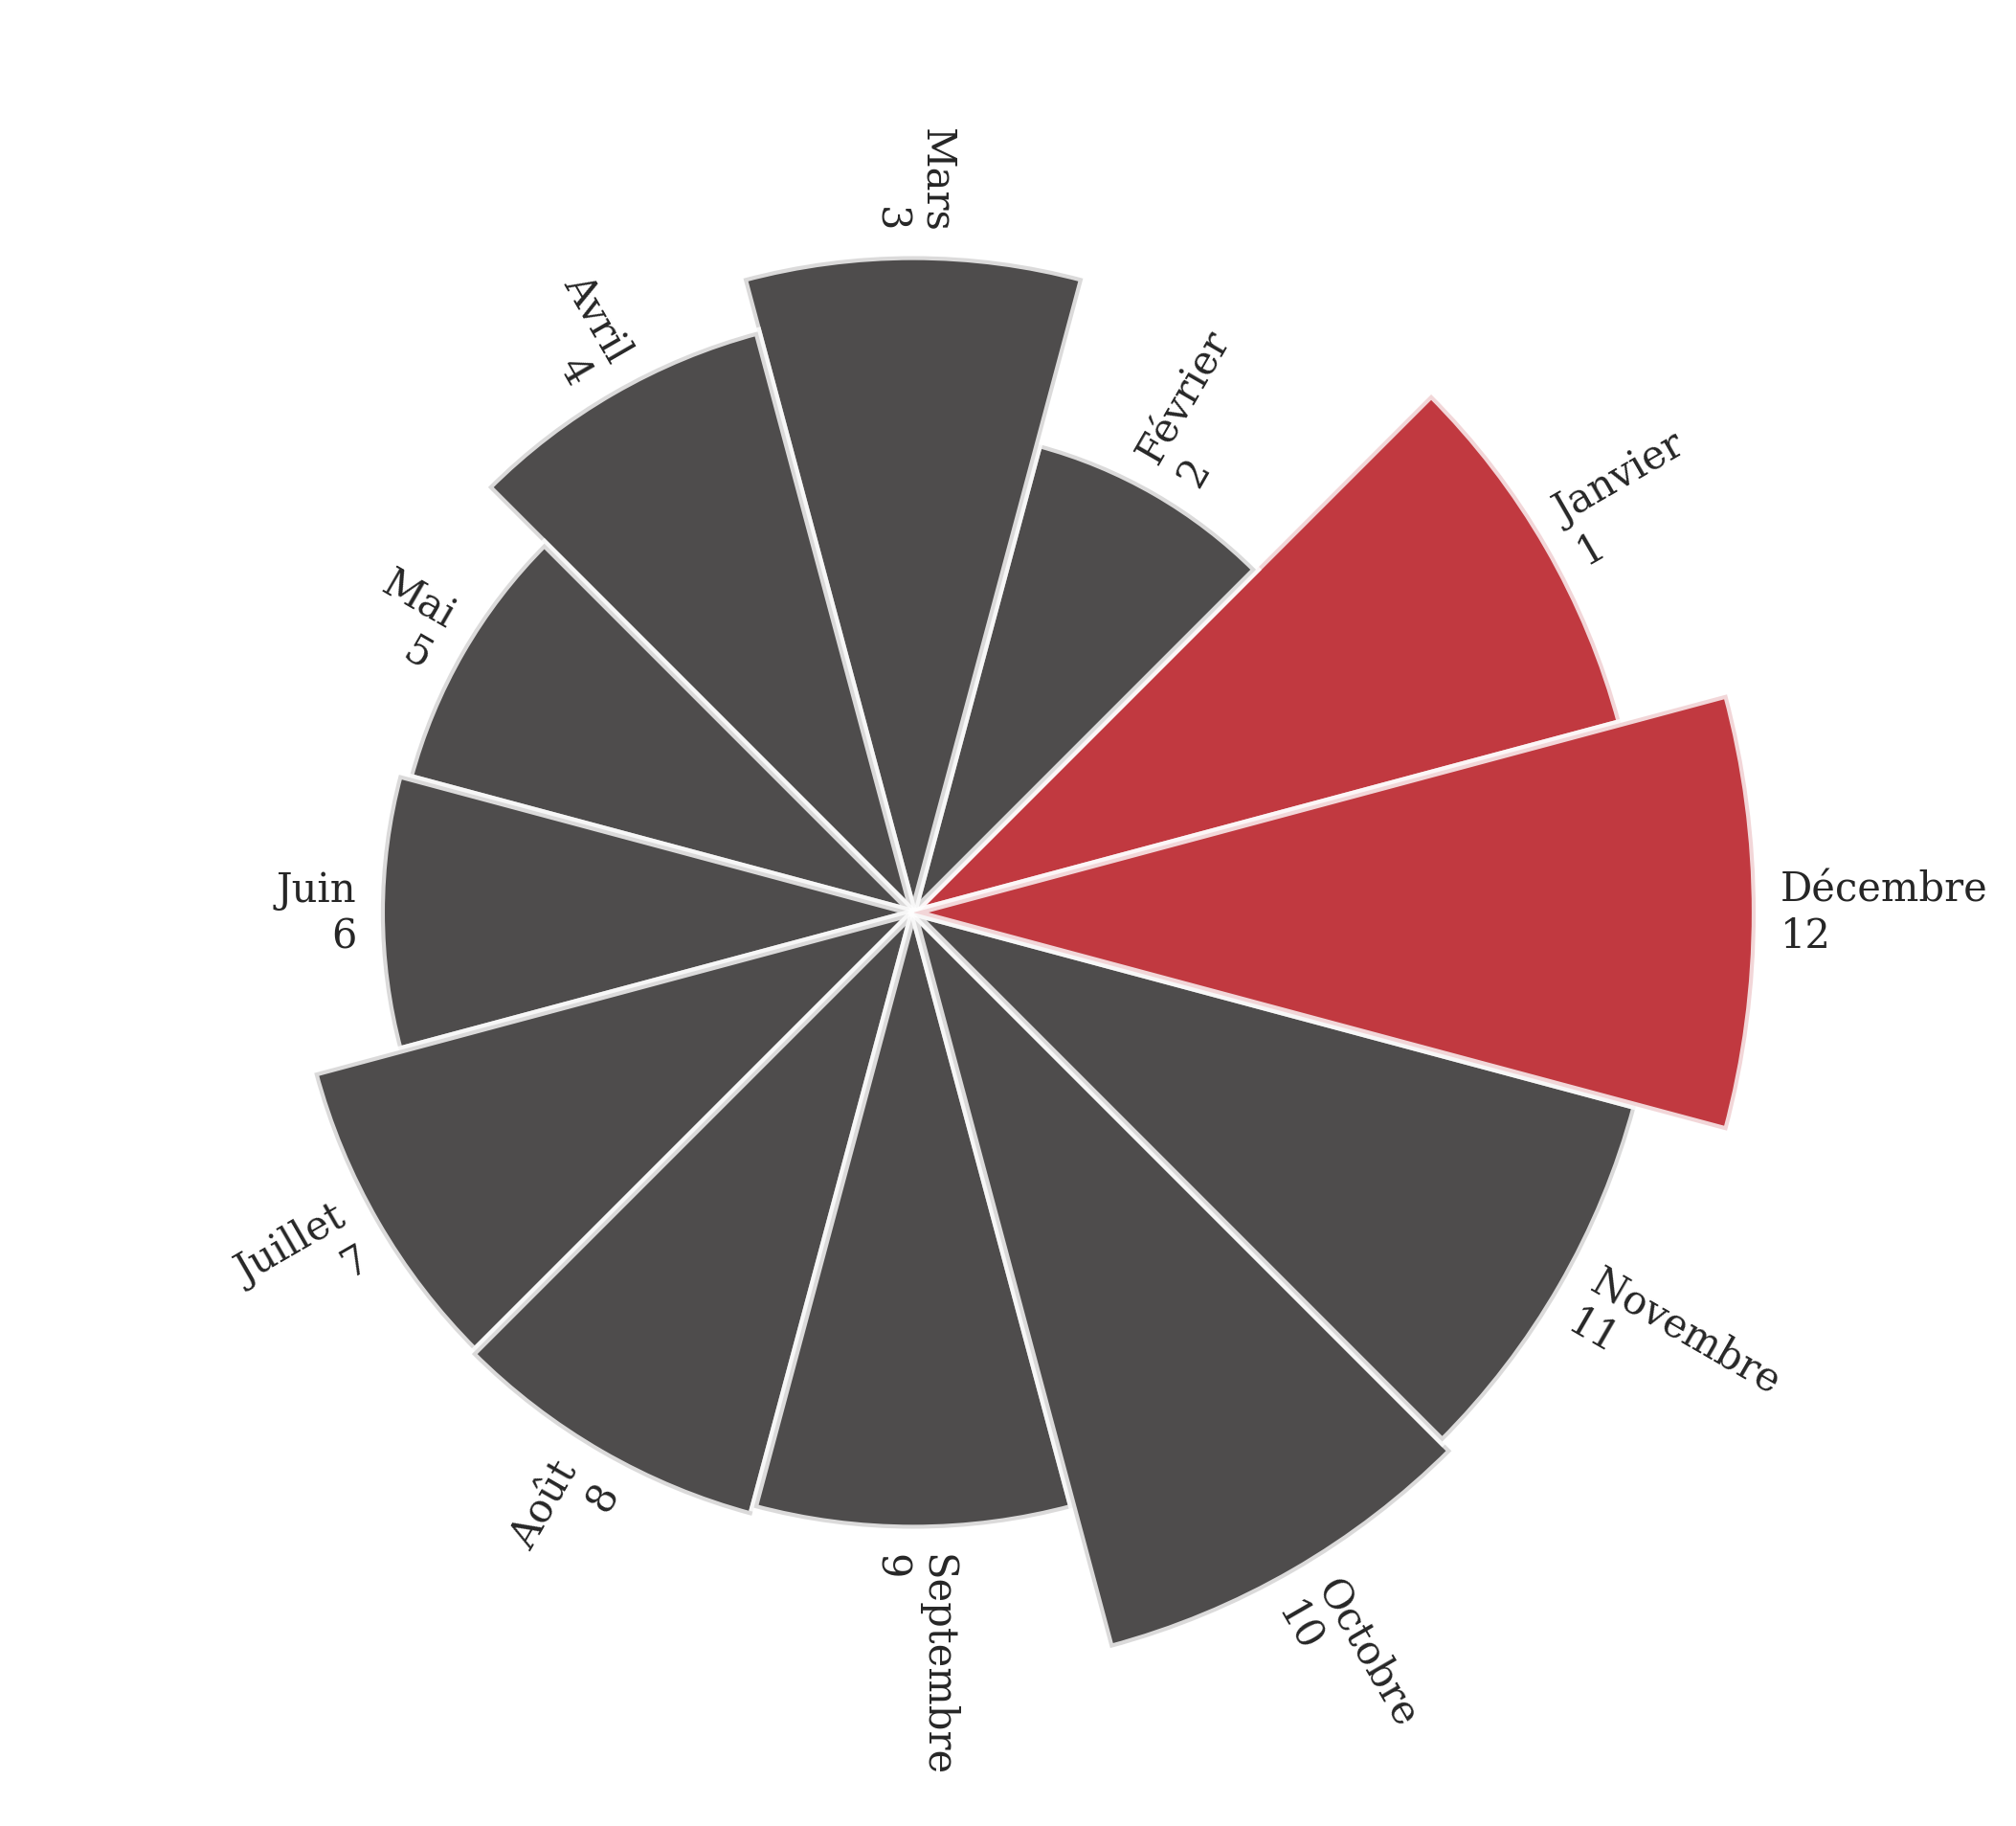

In [40]:
data_sub2 = netflix_df.groupby('type')['month_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()
noms_des_mois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

df_polar = data_sub2.sort_values(by='month_added', ascending=True)

color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # couleur mise en évidence

# Initialiser la figure avec un DPI plus élevé
plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constantes = paramètres contrôlant la mise en page du graphique :
limite_supérieure = 30
limite_inférieure = 1
marge_étiquette = 30

# Calculer le max et le min dans l'ensemble de données
max = df_polar['Value'].max()

# Calculer les hauteurs : elles sont une conversion de chaque valeur d'élément dans ces nouvelles coordonnées
# Dans notre exemple, 0 dans l'ensemble de données sera converti en limite_inférieure (10)
# Le maximum sera converti en limite_supérieure (100)
pente = (max - limite_inférieure) / max
hauteurs = pente * df_polar.Value + limite_inférieure

# Calculer la largeur de chaque barre. Au total, nous avons 2*Pi = 360°
largeur = 2 * np.pi / len(df_polar.index)

# Calculer l'angle autour duquel chaque barre est centrée :
indices = list(range(1, len(df_polar.index)+1))
angles = [element * largeur for element in indices]

# Dessiner les barres
barres = ax.bar(
    x=angles, 
    height=hauteurs, 
    width=largeur, 
    bottom=limite_inférieure,
    linewidth=2, 
    edgecolor="white",
    color=color_map, alpha=0.8
)

# Ajouter des étiquettes
for barre, angle, hauteur, étiquette, mois in zip(barres, angles, hauteurs, df_polar["month_added"], noms_des_mois):

    # Les étiquettes sont inclinées. L'inclinaison doit être spécifiée en degrés :(
    rotation = np.rad2deg(angle)

    # Inverser certaines étiquettes à l'envers
    alignement = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignement = "right"
        rotation = rotation + 180
    else: 
        alignement = "left"

    # Enfin, ajouter les étiquettes
    ax.text(
        x=angle, 
        y=limite_inférieure + barre.get_height() + marge_étiquette, 
        s=f"{mois}\n{étiquette}", 
        ha=alignement, fontsize=10, fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# Sauvegarder la figure avec une meilleure qualité
plt.savefig('polar_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
# nombre_de_contenus = netflix_df.groupby('month_added').size().to_list()
# noms_des_mois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

# max_nombre_de_contenus = max(nombre_de_contenus)
# indice = nombre_de_contenus.index(max(nombre_de_contenus))

# figure = plt.figure(figsize=(20, 8))
# plt.plot(noms_des_mois, nombre_de_contenus, color="skyblue", marker='o', markersize=6)
# plt.scatter(noms_des_mois[indice], max_nombre_de_contenus, s=200, color="darkblue", marker='o')

# plt.title("Nombre de créations de contenu tout au long des mois", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
# plt.suptitle("Le point maximum est représenté par un grand {}".format(r'$\bullet$'),
#              fontsize=13, fontname="monospace", y=0.915)
# plt.ylabel("Nombre de créations de contenu", fontsize=14, fontname="monospace")
# plt.xticks(fontsize=13, fontname="monospace")
# plt.yticks(fontsize=13, fontname="monospace")
# plt.ylim([0, 900])
# plt.show()


<hr>

### 5.4 Les 10 séries télévisées et films les plus anciens ###

In [42]:
# the oldest 10 tv series
oldest_tv_series = netflix_df[netflix_df['type']=="TV Show"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_tv_series.reset_index())

show_id,title,release_year
s4867,Pioneers of African-American Cinema,1946
s6954,The Twilight Zone (Original Series),1963
s6083,The Andy Griffith Show,1967
s5786,Star Trek,1968
s4217,Monty Python's Fliegender Zirkus,1972
s4218,Monty Python's Flying Circus,1974
s1578,Dad's Army,1977
s1950,El Chavo,1979
s4479,Ninja Hattori,1981
s5239,Robotech,1985


In [43]:
# the oldest 10 movies
oldest_movies = netflix_df[netflix_df['type']=="Movie"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_movies.reset_index())

show_id,title,release_year
s6118,The Battle of Midway,1942
s4961,Prelude to War,1942
s7680,WWII: Report from the Aleutians,1943
s7617,Why We Fight: The Battle of Russia,1943
s7343,Undercover: How to Operate Behind Enemy Lines,1943
s6658,The Memphis Belle: A Story of a Flying Fortress,1944
s7269,Tunisian Victory,1944
s6700,The Negro Soldier,1944
s4437,Nazi Concentration Camps,1945
s3426,Know Your Enemy - Japan,1945


<hr>

### 5.5 Les 10 pays qui ont le plus contribué à la création de contenu ###

In [44]:
def count_countires(countries_df):
    '''
    This function just counts the number of countries appears in each entry and returns the dictionary which contains this information
    :param countries_df -> the dataframe which I need to count the countries appear in it
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [45]:
movies_countries = netflix_df[netflix_df["type"]=="Movie"]["country"]
shows_countries = netflix_df[netflix_df["type"]=="TV Show"]["country"]

movies_dict = count_countires(movies_countries)
shows_dict = count_countires(shows_countries)

# to see the results in a dataframe
movies = pd.DataFrame(movies_dict.items(), columns=["country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
shows = pd.DataFrame(shows_dict.items(), columns=["country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

In [67]:
movies['Type'] = 'Movie'
shows['Type'] = 'TV Show'

# Combine the top countries for movies and TV shows
combined_df = pd.concat([movies.head(10), shows.head(10)], keys=['Movie', 'TV Show'], names=['Type']).reset_index(drop=True)

# Save the CSV file in the desired format
combined_df.to_csv('../csv/top_countries_combined.csv', index=False, sep=',', header=True)

In [47]:

display(setting_dataframe(shows))

country,Frequency
United States,866
United Kingdom,256
Japan,184
South Korea,157
Canada,126
France,84
India,75
Taiwan,70
Australia,60
Spain,57


In [48]:
all_contents = movies.merge(shows, how="outer", on="country").head(10)
all_contents.rename(columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, inplace=True)
all_contents = all_contents.astype({"Number of Movies":'int64', "Number of TV Shows":'int64'})
# display(setting_dataframe(all_contents))

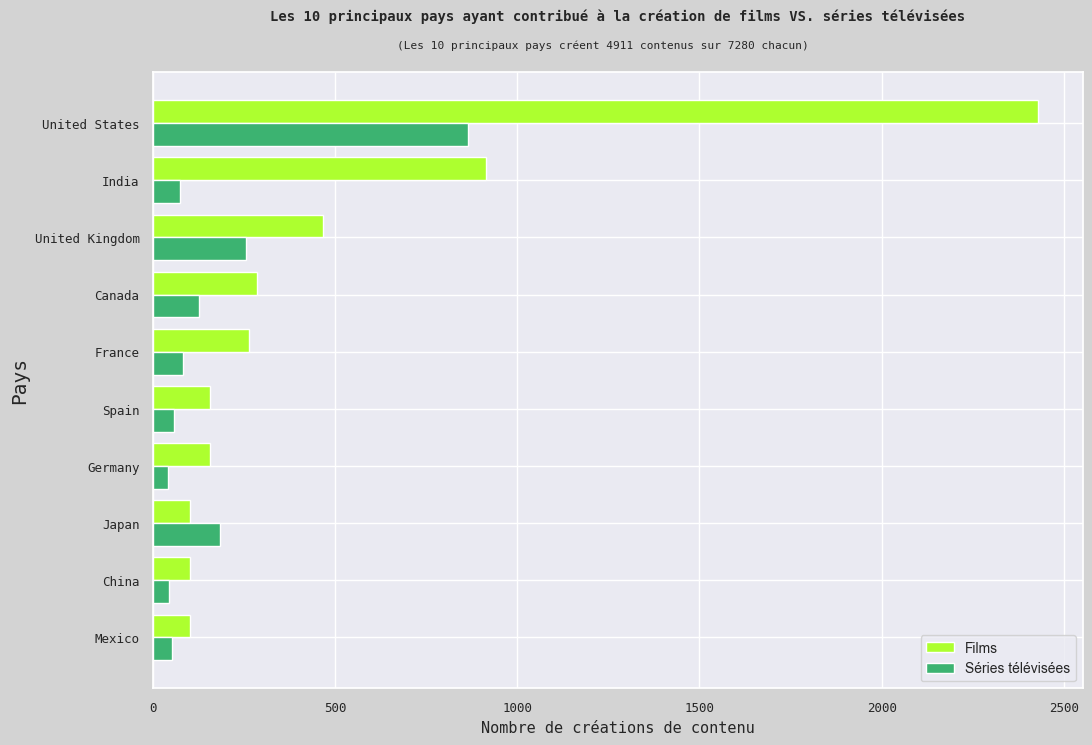

In [49]:
nombre_de_films = all_contents["Number of Movies"]
nombre_de_series = all_contents["Number of TV Shows"]

indices = np.arange(len(nombre_de_films))
largeur = 0.4

figure = plt.figure(figsize=(12, 8), facecolor='lightgray')  # Set the background color

plt.barh(indices, nombre_de_films, largeur, color="greenyellow", label="Films")
plt.barh(indices + largeur, nombre_de_series, largeur, color="mediumseagreen", label="Séries télévisées")

plt.title("Les 10 principaux pays ayant contribué à la création de films VS. séries télévisées", fontname="monospace", fontsize=10, fontweight="bold", y=1.07)
plt.suptitle("(Les 10 principaux pays créent {} contenus sur {} chacun)"
             .format(sum(netflix_df.groupby('country').size().sort_values(ascending=False)[:10]), netflix_df.shape[0]), y=0.92,fontname="monospace", fontsize=8)
plt.ylabel("Pays", fontsize=14, fontname="monospace")
plt.xlabel("Nombre de créations de contenu", fontsize=11, fontname="monospace")
plt.yticks(indices + 0.2, labels=all_contents["country"], fontsize=9, fontname="monospace")
plt.xticks(fontsize=9, fontname="monospace")
plt.gca().invert_yaxis()
plt.legend(fontsize="small")
plt.show()



#### 5.5.2 pourcentage de production de chaque pays

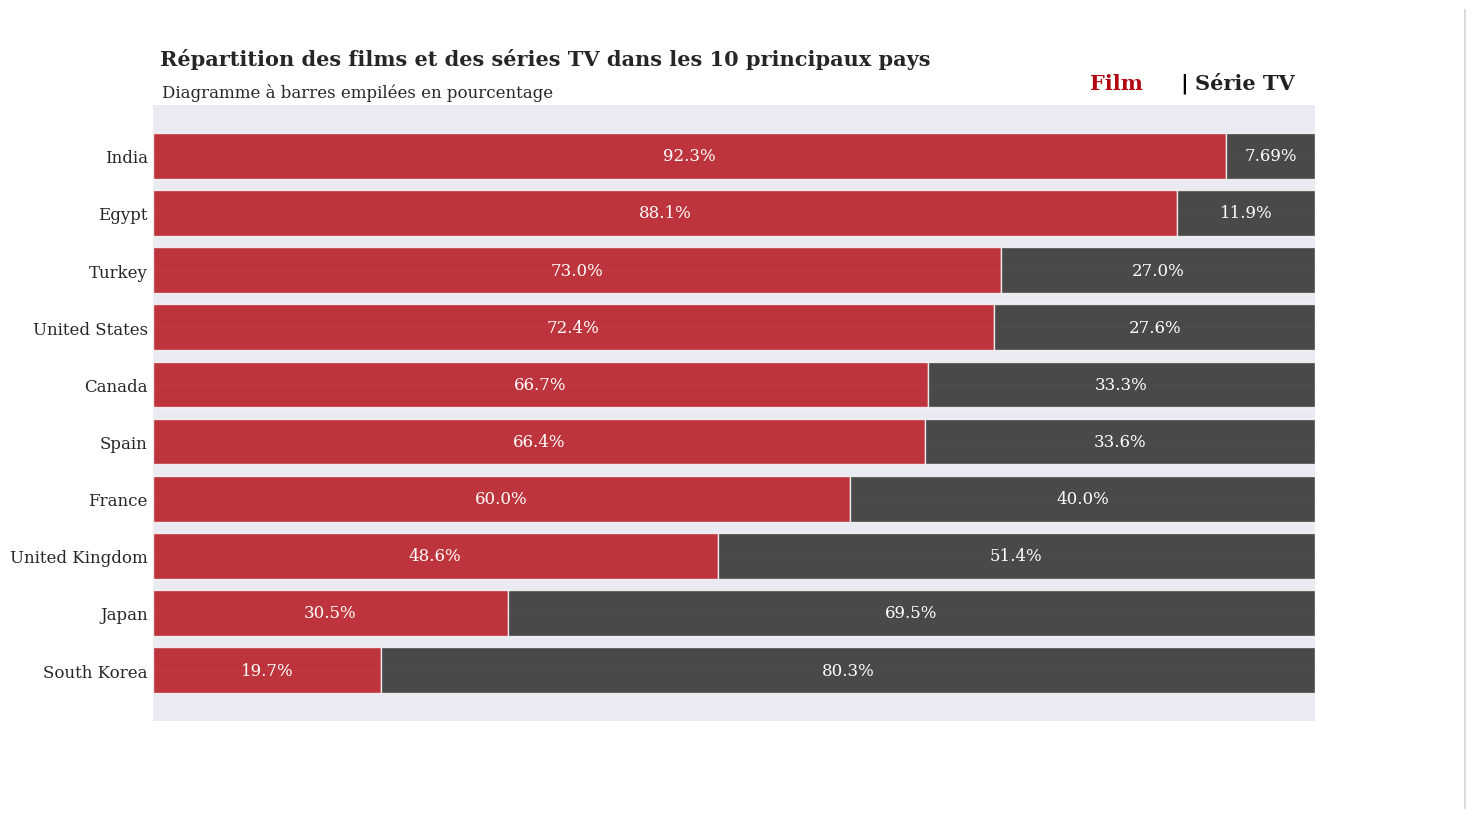

In [50]:
country_order = netflix_df['country'].value_counts()[:10].index
data_q2q3 = netflix_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

###
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Film')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='Série TV')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# Pourcentage de films
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

# Pourcentage d'émissions de télévision
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.13, 0.93, 'Répartition des films et des séries TV dans les 10 principaux pays', 
         fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Diagramme à barres empilées en pourcentage', fontsize=12, fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75, 0.9, "Film", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81, 0.9, "|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82, 0.9, "Série TV", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both', length=0)

plt.show()


### 5.6. Les catégories les plus fréquentes ###

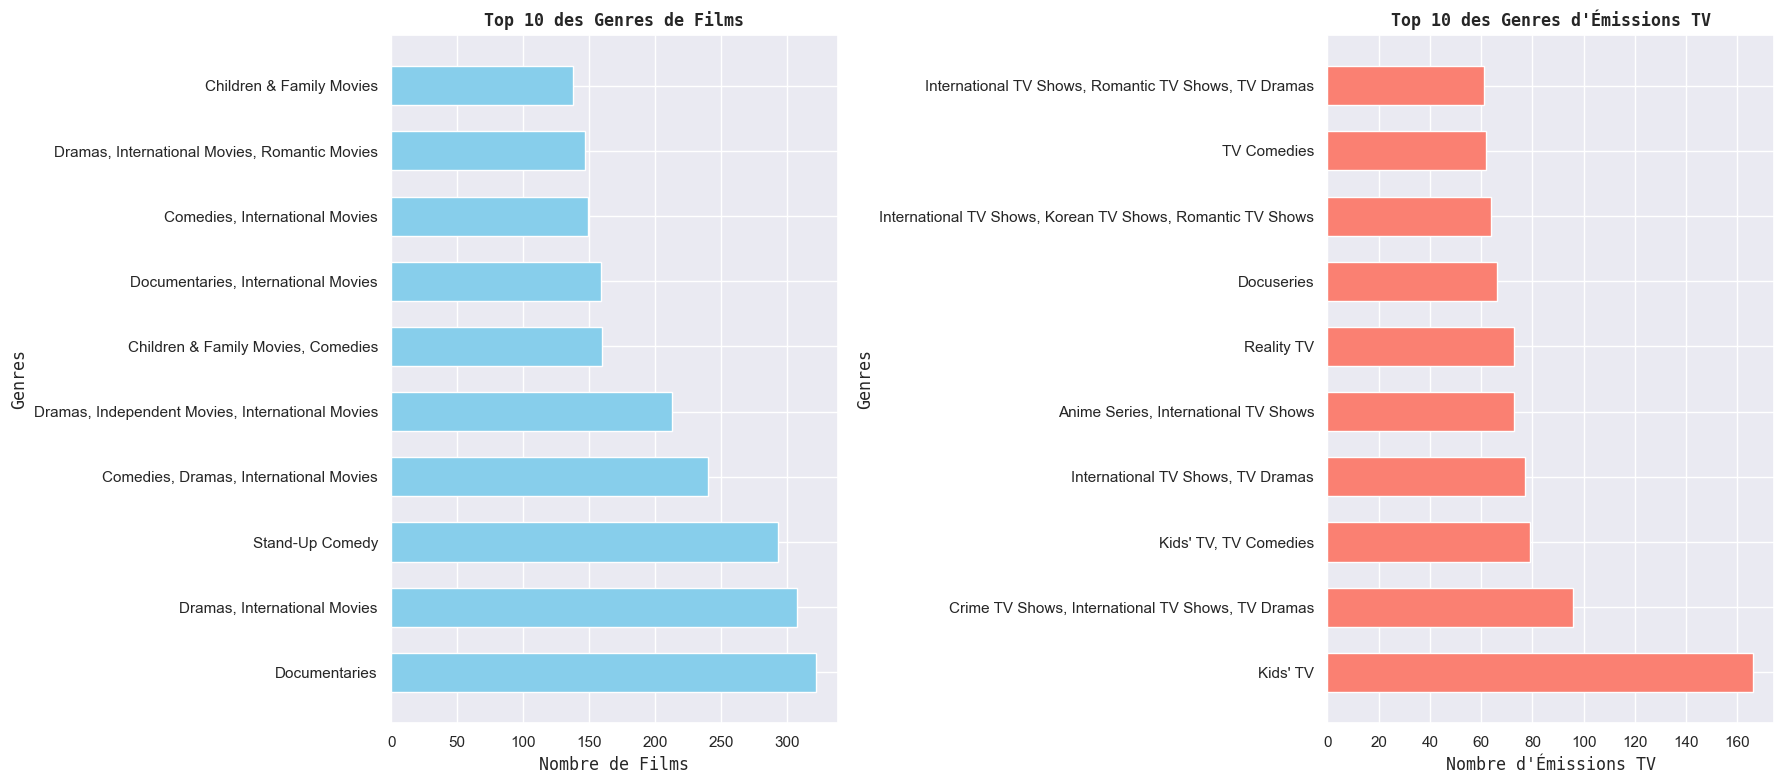

In [51]:
# Création des sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
émissions_tv = netflix_df[netflix_df['type'] == 'TV Show']
films = netflix_df[netflix_df['type'] == 'Movie']

# Tracé des genres les plus populaires pour les films
genres_top_films = films['listed_in'].value_counts().head(10)
axes[0].barh(genres_top_films.index, genres_top_films.values, color='skyblue', height=0.6)  # Ajuster la largeur des barres
axes[0].set_title('Top 10 des Genres de Films', fontweight='bold', fontname='monospace')  # Définir le style de police
axes[0].set_xlabel('Nombre de Films', fontname='monospace')  # Définir le style de police
axes[0].set_ylabel('Genres', fontname='monospace')  # Définir le style de police

# Tracé des genres les plus populaires pour les émissions TV
genres_top_emissions_tv = émissions_tv['listed_in'].value_counts().head(10)
axes[1].barh(genres_top_emissions_tv.index, genres_top_emissions_tv.values, color='salmon', height=0.6)  # Ajuster la largeur des barres
axes[1].set_title('Top 10 des Genres d\'Émissions TV', fontweight='bold', fontname='monospace')  # Définir le style de police
axes[1].set_xlabel('Nombre d\'Émissions TV', fontname='monospace')  # Définir le style de police
axes[1].set_ylabel('Genres', fontname='monospace')  # Définir le style de police

# Ajustement de la mise en page
plt.tight_layout()
plt.show()


> De nombreux films ou émissions de télévision sont classés dans différentes catégories en même temps, et nous voulons prendre en compte toutes les catégories. Il faut donc aller dans chaque film ou émission de télévision et voir ses catégories.

In [52]:
categories_df = netflix_df.loc[netflix_df['listed_in'].notnull()]['listed_in']

categories_dict = dict()
for category_entry in categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in categories_dict.keys():
            categories_dict[category] += 1
        else:
            categories_dict[category] = 1
            
# to see the results in a dataframe
results = pd.DataFrame(categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(results.head(10)))

Category,Frequency
International Movies,2342
Dramas,2062
Comedies,1429
International TV Shows,1043
Documentaries,742
Action & Adventure,706
Independent Movies,670
TV Dramas,623
Romantic Movies,521
Thrillers,480



Les films et les émissions de télévision ont des catégories distinctes. Par exemple, les films sont classés dans "Films et drames internationaux", tandis que les émissions de télévision se trouvent dans "Émissions de télévision internationales et drames télévisés". Ainsi, il est préférable de les présenter séparément.

In [53]:
movies_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="Movie"]['listed_in']

movies_categories_dict = dict()
for category_entry in movies_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in movies_categories_dict.keys():
            movies_categories_dict[category] += 1
        else:
            movies_categories_dict[category] = 1
            
# to see the results in a dataframe
movies = pd.DataFrame(movies_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(movies.head(10)))

Category,Frequency
International Movies,2342
Dramas,2062
Comedies,1429
Documentaries,742
Action & Adventure,706
Independent Movies,670
Romantic Movies,521
Thrillers,480
Children & Family Movies,479
Horror Movies,306


In [54]:
shows_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="TV Show"]['listed_in']

shows_categories_dict = dict()
for category_entry in shows_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in shows_categories_dict.keys():
            shows_categories_dict[category] += 1
        else:
            shows_categories_dict[category] = 1
            
# to see the results in a dataframe
shows = pd.DataFrame(shows_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(shows.head(10)))

Category,Frequency
International TV Shows,1043
TV Dramas,623
TV Comedies,470
Crime TV Shows,396
Kids' TV,344
Docuseries,314
Romantic TV Shows,281
British TV Shows,220
Reality TV,189
TV Action & Adventure,141


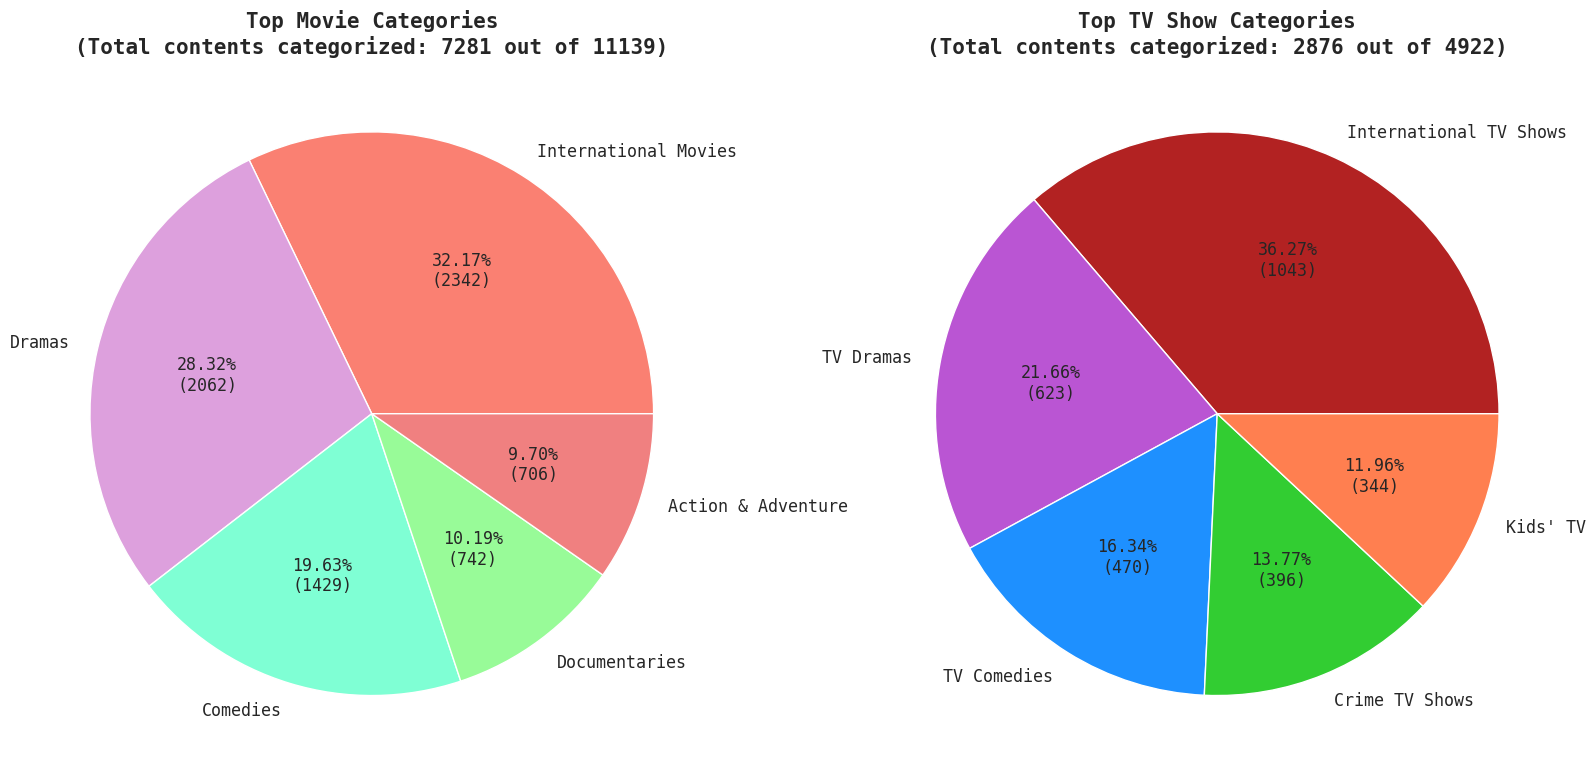

In [55]:
brighter_colors = ["salmon", "plum", "aquamarine", "palegreen", "lightcoral"]
opposite_colors = ["firebrick", "mediumorchid", "dodgerblue", "limegreen", "coral"]

figure = plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)

top_movies_categories = movies.head(5)

plt.pie(top_movies_categories["Frequency"], labels=top_movies_categories["Category"],
        colors=brighter_colors,
        autopct=make_autopct(top_movies_categories['Frequency']),
        wedgeprops={"edgecolor": "white",
                    'linewidth': 1,
                    'antialiased': True},
        textprops={"fontname": 'monospace',
                   "fontsize": 12})
plt.title("Top Movie Categories\n(Total contents categorized: {} out of {})"
          .format(sum(top_movies_categories["Frequency"]), movies["Frequency"].sum()),
          fontname="monospace", fontsize=15, fontweight="bold")

plt.subplot(1, 2, 2)

top_shows_categories = shows.head(5)

plt.pie(top_shows_categories["Frequency"], labels=top_shows_categories["Category"],
        colors=opposite_colors,
        autopct=make_autopct(top_shows_categories['Frequency']),
        wedgeprops={"edgecolor": "white",
                    'linewidth': 1,
                    'antialiased': True},
        textprops={"fontname": 'monospace',
                   "fontsize": 12})
plt.title("Top TV Show Categories\n(Total contents categorized: {} out of {})"
          .format(sum(top_shows_categories["Frequency"]), shows["Frequency"].sum()),
          fontname="monospace", fontsize=15, fontweight="bold")

plt.ylabel("")
plt.show()


<hr>

### 5.7. Nombre de films et d'émissions de télévision par classification MPA ###

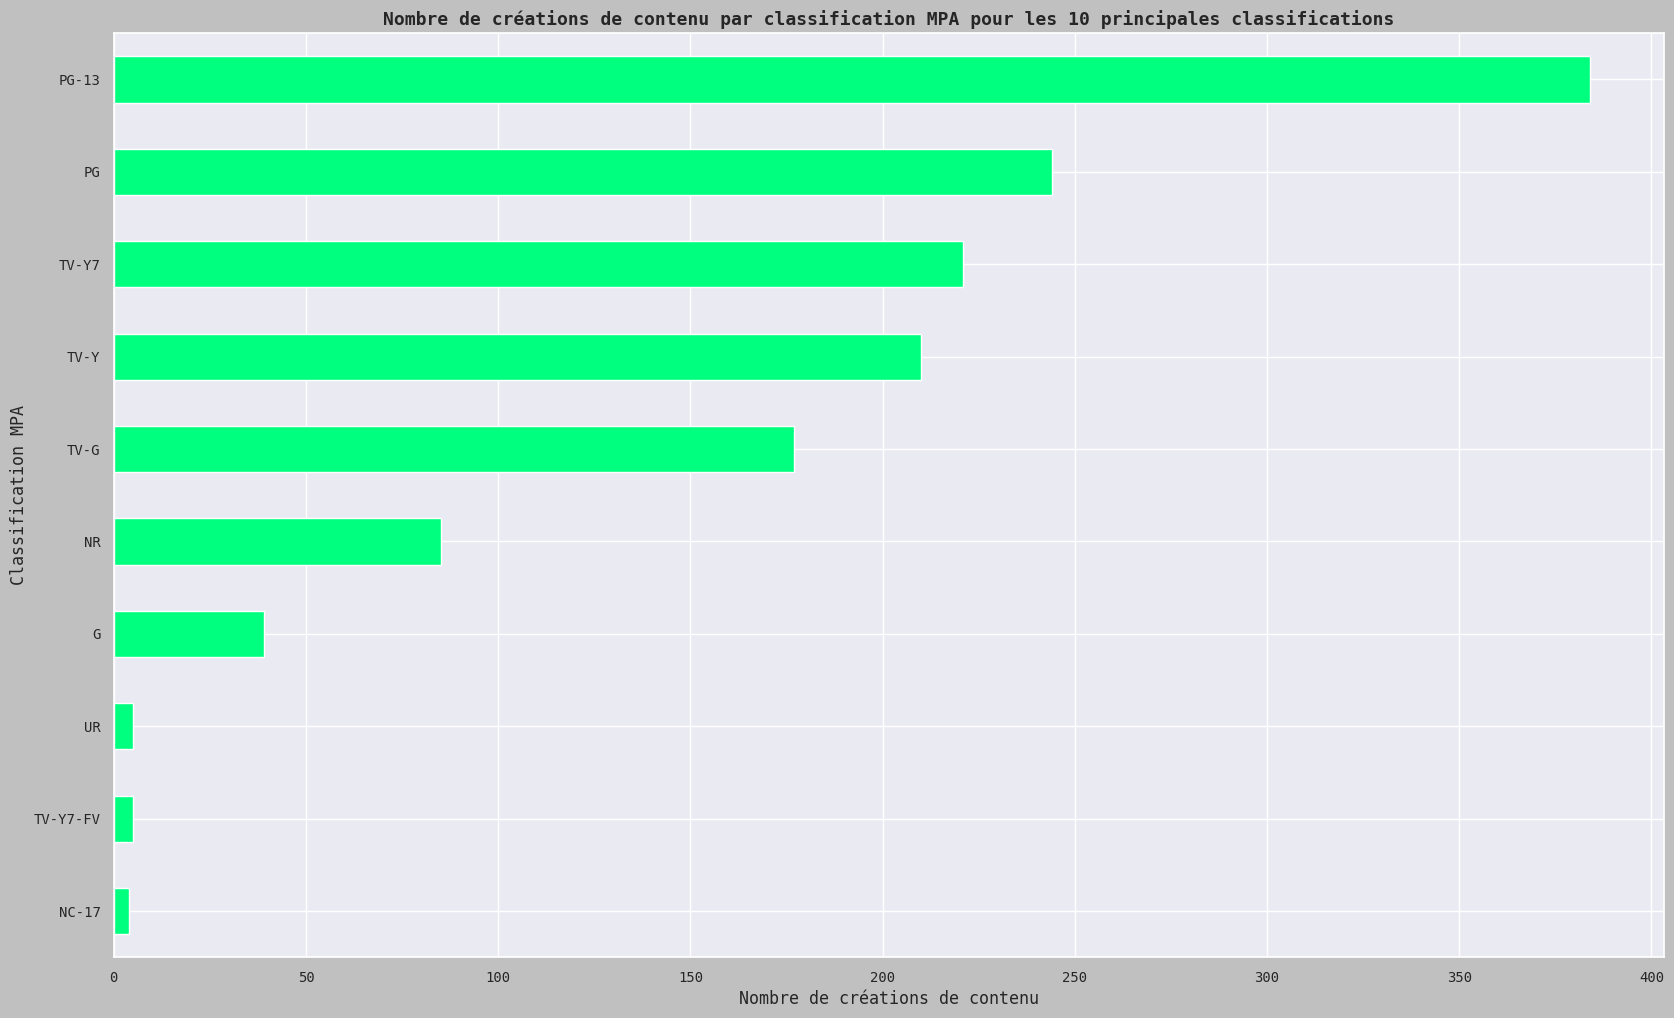

In [56]:
nombre_de_contenus_par_mpa = netflix_df["MPA_rating"].value_counts().sort_values()[:10]

figure = plt.figure(figsize=(20, 12), facecolor='silver')  # Setting the background color

nombre_de_contenus_par_mpa.plot(kind="barh", color="springgreen")
plt.title("Nombre de créations de contenu par classification MPA pour les 10 principales classifications", fontname="monospace", fontsize=13, fontweight="bold")
plt.xlabel("Nombre de créations de contenu", fontsize=12, fontname="monospace")
plt.ylabel("Classification MPA", fontsize=12, fontname="monospace")
plt.xticks(fontsize=10  , fontname="monospace")
plt.yticks(fontsize=10, fontname="monospace")
plt.show()

In [57]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

#### 5.6.2 en pourcentage

## 6. Application de l'algorithme K-means


In [58]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

> Le nettoyage et la normalisation des descriptions du DataFrame __netflix_df__ , la conversion du texte en minuscules, suppression dea ponctuations et division des descriptions en mots pour les préparer à une analyse ultérieure

In [59]:
netflix_df['description'].astype(str)
netflix_df['description'] = netflix_df['description'].apply(lambda x: x.split(' '))
netflix_df['description']= netflix_df['description'].apply(lambda x: " ".join(x))
netflix_df['description']= netflix_df['description'].apply(lambda x: x.lower())
netflix_df['description']= netflix_df['description'].apply(remove_punctuation)

netflix_df['description'][0:10]

show_id
s1     in a future where the elite inhabit an island ...
s2     after a devastating earthquake hits mexico cit...
s3     when an army recruit is found dead his fellow ...
s4     in a postapocalyptic world ragdoll robots hide...
s5     a brilliant group of students become cardcount...
s6     a genetics professor experiments with a treatm...
s7     after an awful accident a couple admitted to a...
s8     after one of his high school students attacks ...
s9     when a doctor goes missing his psychiatrist wi...
s10    an architect and his wife move into a castle t...
Name: description, dtype: object

> suppression des stopwords

In [60]:

nltk.download('stopwords')
sw = stopwords.words('english')

def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    return " ".join(text)

netflix_df['description'] = netflix_df['description'].apply(stopwords)
netflix_df['description'][0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouaaaadha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

####  Conversion de texte des descriptions en une représentation numérique

In [61]:

tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(netflix_df['description'])
X_tfidf.shape
X = X_tfidf.toarray() 

#### K-Means

In [62]:


#  l'algorithme du coude (Elbow Method) pour 
# déterminer un bon nombre de clusters pour un algorithme de clustering K-means.
wcss_list = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.style.use('seaborn-darkgrid')  # Changing the plot style

plt.plot(range(1, 20), wcss_list, marker='o', linestyle='-', color='mediumseagreen')  # Adjusting marker and line style
plt.title('The Elbow Method Graph', fontweight='bold', fontsize=14)  # Adding bold title and adjusting font size
plt.xlabel('Number of clusters (k)', fontsize=12)  # Adjusting label font size
plt.ylabel('WCSS', fontsize=12)  # Adjusting label font size
plt.xticks(fontsize=10)  # Adjusting tick label font size
plt.yticks(fontsize=10)  # Adjusting tick label font size
plt.show()

KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters= 20, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X) 
     
netflix_df["cluster"] = y_predict

Ce code utilise l'algorithme K-means pour regrouper les données en 20 clusters distincts à partir des vecteurs de caractéristiques numériques générés précédemment. Il applique K-means aux données transformées (stockées dans X) et attribue chaque échantillon à un cluster spécifique en utilisant la méthode fit_predict. Ensuite, il crée une nouvelle colonne appelée "cluster" dans le DataFrame netflix_df pour stocker les étiquettes de cluster attribuées à chaque échantillon.


Ce code utilise seaborn pour afficher un graphique de type "countplot" montrant la répartition des éléments par type de contenu dans chaque cluster. Chaque barre représente le nombre d'éléments dans chaque cluster, coloré par type de contenu grâce à l'argument hue.

Les éléments du DataFrame netflix_df sont regroupés par leur étiquette de cluster, et la répartition de ces éléments est affichée en fonction du type de contenu. La taille de chaque barre indique le nombre d'éléments de ce type dans chaque cluster.

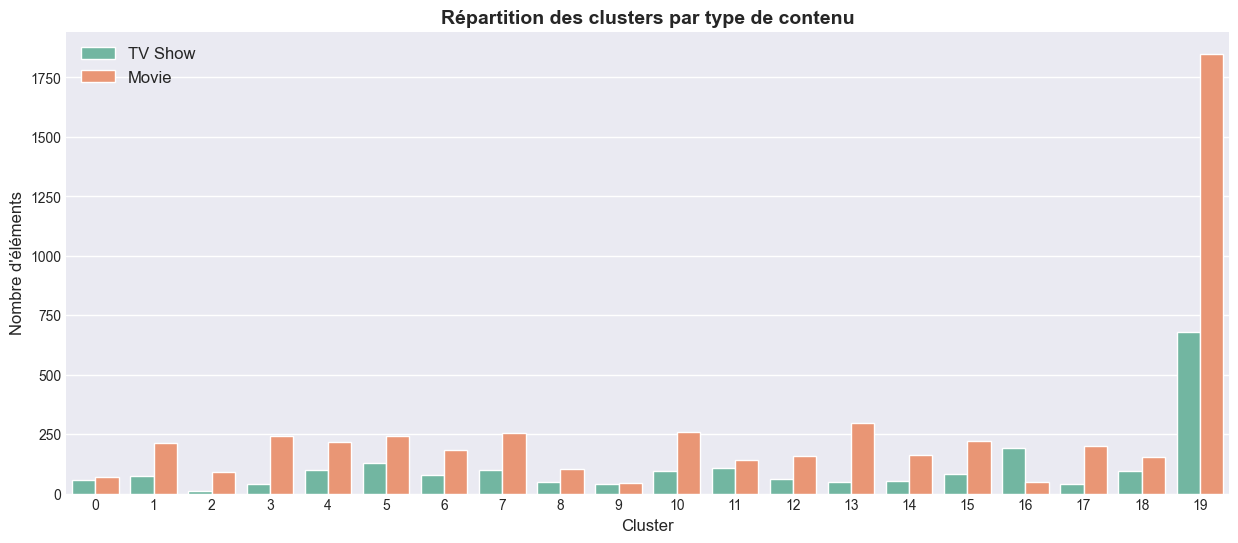

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(x='cluster', hue='type', data=netflix_df, palette='Set2', ax=ax)

# Ajouter des styles de police
ax.set_title('Répartition des clusters par type de contenu', fontweight='bold', fontsize=14)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Nombre d\'éléments', fontsize=12)
ax.tick_params(labelsize=10)
plt.legend(fontsize='medium')

plt.show()

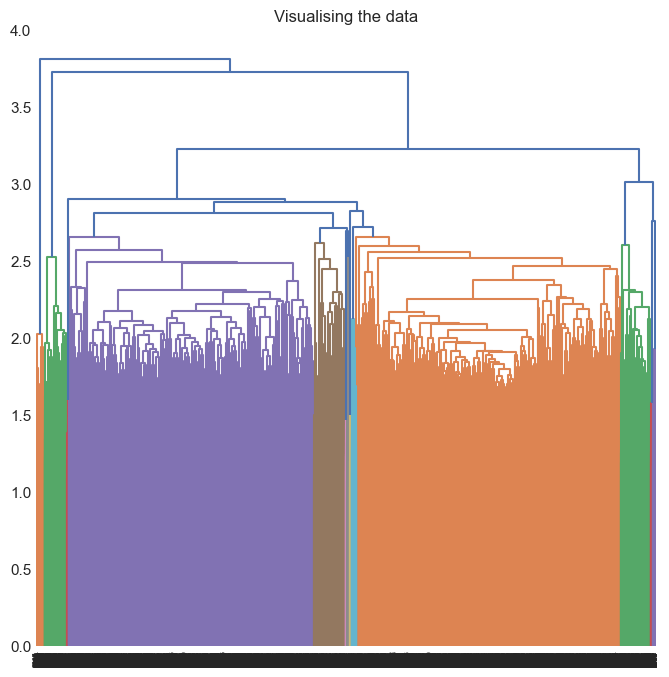

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

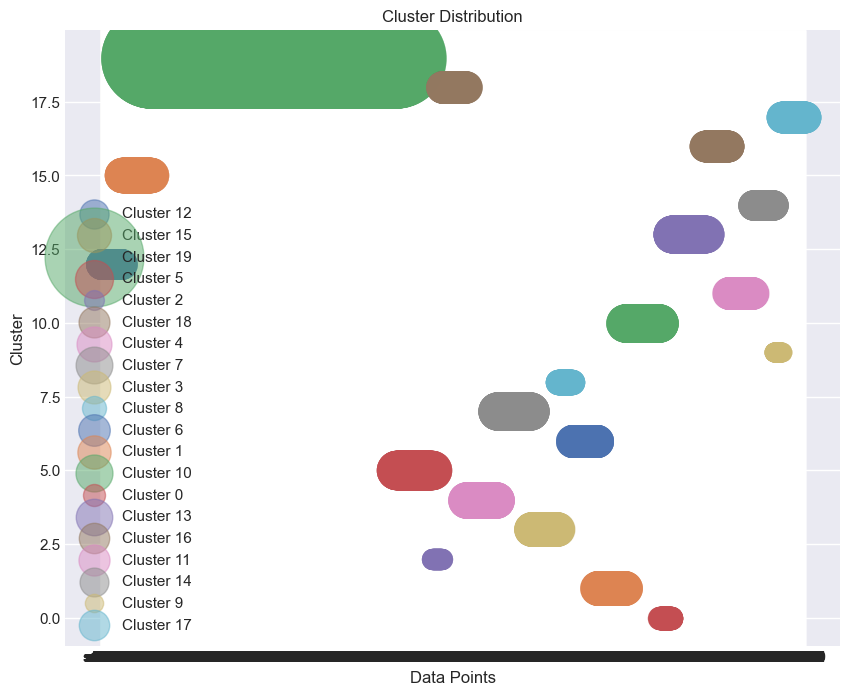

In [ ]:
plt.figure(figsize=(10, 8))

# Grouping by cluster and counting the occurrences
cluster_counts = netflix_df['cluster'].value_counts()

# Getting the unique clusters
clusters = netflix_df['cluster'].unique()

# Plotting each cluster as a bubble
for cluster in clusters:
    size = cluster_counts[cluster] * 2  # Adjusting size for better visibility
    plt.scatter(netflix_df[netflix_df['cluster'] == cluster].index,
                netflix_df[netflix_df['cluster'] == cluster]['cluster'],
                s=size, label=f'Cluster {cluster}', alpha=0.5)

plt.title('Cluster Distribution')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.legend()
plt.show()
